In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
Univ = pd.read_csv("C:\\Users\\Neha Excelr\\DataSets\\Universities.csv")

In [3]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
# Similar to the sklearn.preprocessing, MinMaxScaler function
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Similar to the sklearn.preprocessing, StandardScaler function
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [6]:
x=norm_func(Univ.iloc[:,1:])
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.401994,0.644235,-0.871888,0.068841,-0.324717,0.803729
1,1.370988,1.210256,-0.719814,-1.652182,2.508651,-0.631501
2,-0.059432,-0.745090,1.003685,-0.914600,-0.163745,-1.625123
3,0.401994,-0.024699,-0.770506,-0.177019,0.285756,0.141315
4,0.125139,0.335496,-0.314285,0.068841,-0.382949,0.362120
5,0.678850,0.644235,-0.821197,-0.668740,0.330956,0.914132
6,0.448137,0.695691,-0.466359,-0.177019,0.290956,0.914132
7,-0.105574,-0.127612,-0.770506,-0.177019,-0.503436,0.582924
8,1.232561,0.747148,-1.277417,-0.422880,0.841393,1.134936
9,0.355852,-0.076156,0.243318,-1.406321,2.170070,0.030913


In [7]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [8]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

C:\Users\Neha Excelr\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[144.0, 61.5794725920986, 42.75049126219293, 32.30816813425175, 25.875534362767784, 22.10707111519673, 17.826160349625475, 15.649598055335574, 12.93965221417038, 10.214923629637575]


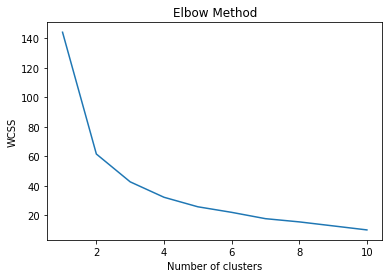

In [9]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(x)

KMeans(n_clusters=3, random_state=0)

In [11]:
clusters_new.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [13]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [14]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [15]:
#These are standardized values.
clusters_new.cluster_centers_

array([[ 0.88905483,  0.72427829, -0.7536085 , -0.75069359,  0.95590992,
         0.60745831],
       [-1.89129229, -1.94145231,  1.56128756,  1.60546806, -1.2086753 ,
        -1.65272331],
       [-0.03636036,  0.10394205,  0.04477719,  0.02786417, -0.31404067,
         0.09531404]])

In [16]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\Neha Excelr\AppData\Local\Temp\ipykernel_18436\1373723157.py:1: FutureWarning: ['Univ'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Univ.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


In [17]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [18]:
Univ['clusterid_new']=Univ['clusterid_new'].replace(0, 'Cluster 1')
Univ['clusterid_new']=Univ['clusterid_new'].replace(1, 'Cluster 2')
Univ['clusterid_new']=Univ['clusterid_new'].replace(2, 'Cluster 3')
#Univ['clusterid_new']=Univ['clusterid_new'].replace(3, 'Cluster 4')
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,Cluster 3
1,CalTech,1415,100,25,6,63575,81,Cluster 1
2,CMU,1260,62,59,9,25026,72,Cluster 3
3,Columbia,1310,76,24,12,31510,88,Cluster 3
4,Cornell,1280,83,33,13,21864,90,Cluster 3
5,Dartmouth,1340,89,23,10,32162,95,Cluster 1
6,Duke,1315,90,30,12,31585,95,Cluster 1
7,Georgetown,1255,74,24,12,20126,92,Cluster 3
8,Harvard,1400,91,14,11,39525,97,Cluster 1
9,JohnsHopkins,1305,75,44,7,58691,87,Cluster 1


In [19]:
Univ.columns

Index(['Univ', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate',
       'clusterid_new'],
      dtype='object')

In [ ]:
Univ['clusterid_new'].value_counts()